In [1]:
import CellScopes as cs

WebIO._IJuliaInit()

Welcome to use CellScopes.jl!


### Step 1. Load the cs object generated in Figure 1

In [2]:
@time dkd1 = cs.load(filename = "../../processed_data/version_1/dkd1_by_CS.jld2") 

  8.329876 seconds (10.09 M allocations: 1.636 GiB, 5.83% gc time, 88.80% compilation time: 13% of which was recompilation)


VisiumObject in CellScopes.jl


Genes x Cells = 18063 x 2802
Available data:
- rawCount
- normCount
- metaData
- spmetaData
- imageData
All fields:
- rawCount
- normCount
- scaleCount
- metaData
- spmetaData
- varGene
- dimReduction
- clustData
- imageData


### Step 2. Generate Spatial Feature Plot for selected marker genes

In [3]:
using CairoMakie

In [4]:
empty_theme = Theme(
    Axis = (
        backgroundcolor = :transparent,
        leftspinevisible = false,
        rightspinevisible = false,
        bottomspinevisible = false,
        topspinevisible = false,
        xticklabelsvisible = false, 
        yticklabelsvisible = false,
        xgridcolor = :transparent,
        ygridcolor = :transparent,
        xminorticksvisible = false,
        yminorticksvisible = false,
        xticksvisible = false,
        yticksvisible = false,
        xautolimitmargin = (0.0,0.0),
        yautolimitmargin = (0.0,0.0),
    )
);

update_theme!(empty_theme)

In [5]:
gene_array = ["MS4A1", "CXCL13", "CD2", "CXCR5"];
alpha = 0.01
color_code = ("#000000",alpha)

for gene in gene_array
    p = cs.sp_feature_plot(dkd1, gene; 
        marker_size = 13, color_keys=["gray90", "blue" ,"darkblue"], width = 800, height = 750,
    adjust_contrast=1.5, adjust_brightness = 0.1, scale=true, alpha=[0,0.6],clip=0.2,img_res="high");
    p

    save("../../plots/version_1/main_figures_cs/spFeaturePlot_cs_"*gene*".png", p)
    save("../../plots/version_1/main_figures_cs/spFeaturePlot_cs_"*gene*".pdf", p)
    save("../../plots/version_1/main_figures_cs/spFeaturePlot_cs_"*gene*".svg", p)
    
end

#### Step 2.1. Zoom in CXCL13 

In [6]:
gene = "CXCL13"

p = cs.sp_feature_plot(dkd1, gene; 
    marker_size = 100, color_keys=["gray90", "blue" ,"darkblue"], 
    adjust_contrast=1.5, adjust_brightness = 0.1, scale=true, alpha=[0,.6],clip=0.2,
    height=900, width=1000,img_res="full",  
    x_lims=(6000, 7000),
    y_lims=(1800, 2700))

save("../../plots/version_1/supp_figures_cs/spFeaturePlot_cs_"*gene*"_zoom.png", p)
save("../../plots/version_1/supp_figures_cs/spFeaturePlot_cs_"*gene*"_zoom.pdf", p)
save("../../plots/version_1/supp_figures_cs/spFeaturePlot_cs_"*gene*"_zoom.svg", p)

CairoMakie.Screen{SVG}


### Step 3. Generate sptial feature plot for other marker genes

In [7]:
gene_array = ["NPHS1", "AQP2", "SLC12A1"];
alpha = 0.01
color_code = ("#000000",alpha)

for gene in gene_array
    p = cs.sp_feature_plot(dkd1, gene; 
        marker_size = 13, color_keys=["gray90", "blue" ,"darkblue"], width = 800, height = 750,
    adjust_contrast=1.5, adjust_brightness = 0.1, scale=true, alpha=[0,0.6],clip=0.2,img_res="high");
    p

    save("../../plots/version_1/supp_figures_cs/spFeaturePlot_cs_"*gene*".png", p);
    save("../../plots/version_1/supp_figures_cs/spFeaturePlot_cs_"*gene*".pdf", p);
    save("../../plots/version_1/supp_figures_cs/spFeaturePlot_cs_"*gene*".svg", p);
    
end

#### Step 3.2. change LRP2 visualization cutoff

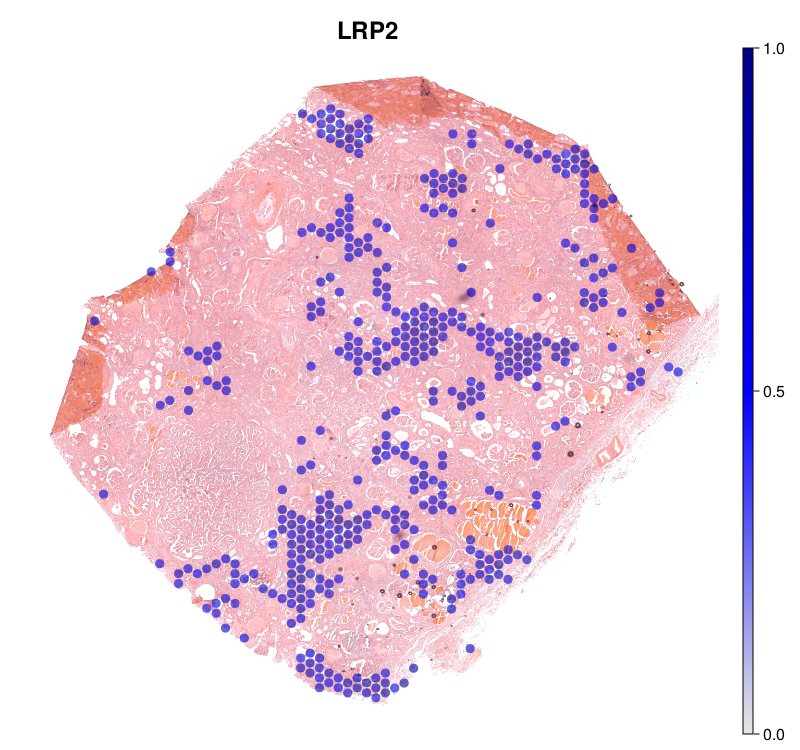

In [8]:
gene = "LRP2"

p = cs.sp_feature_plot(dkd1, gene; 
        marker_size = 13, color_keys=["gray90", "blue" ,"darkblue"], width = 800, height = 750,
    adjust_contrast=1.5, adjust_brightness = 0.1, scale=true, alpha=[0,0.6],clip=0.6,img_res="high");


save("../../plots/version_1/supp_figures_cs/spFeaturePlot_cs_"*gene*".png", p);
save("../../plots/version_1/supp_figures_cs/spFeaturePlot_cs_"*gene*".pdf", p);
save("../../plots/version_1/supp_figures_cs/spFeaturePlot_cs_"*gene*".svg", p);

p

### Step 3.1. Generate a zoom-in version of NPHS1 gene spFeaturePlot

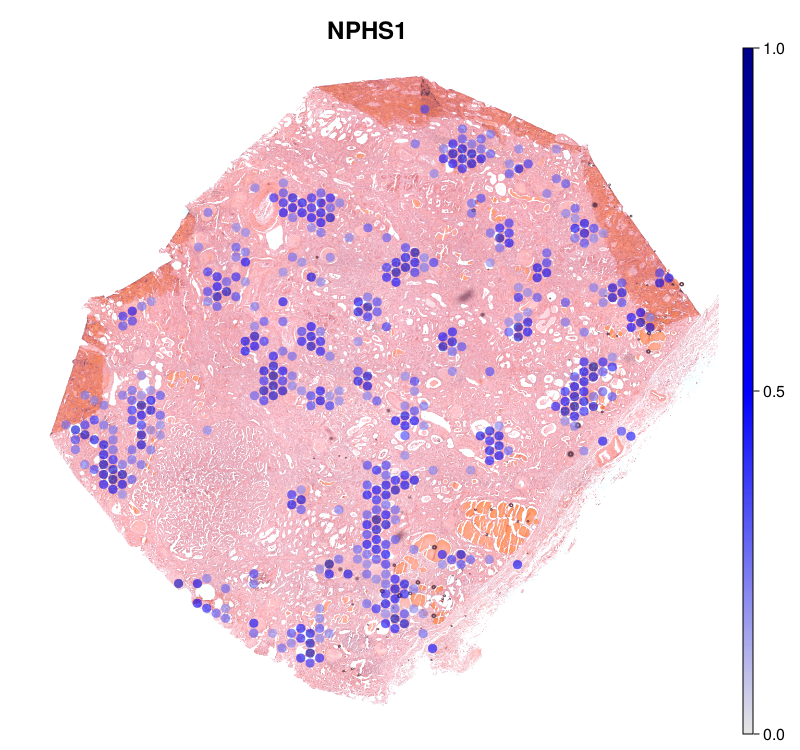

In [9]:
p = cs.sp_feature_plot(dkd1, "NPHS1"; 
        marker_size = 13, color_keys=["gray90", "blue" ,"darkblue"], width = 800, height = 750,
    adjust_contrast=1.5, adjust_brightness = 0.1, scale=true, alpha=[0,0.6],clip=0.2,img_res="high");
p

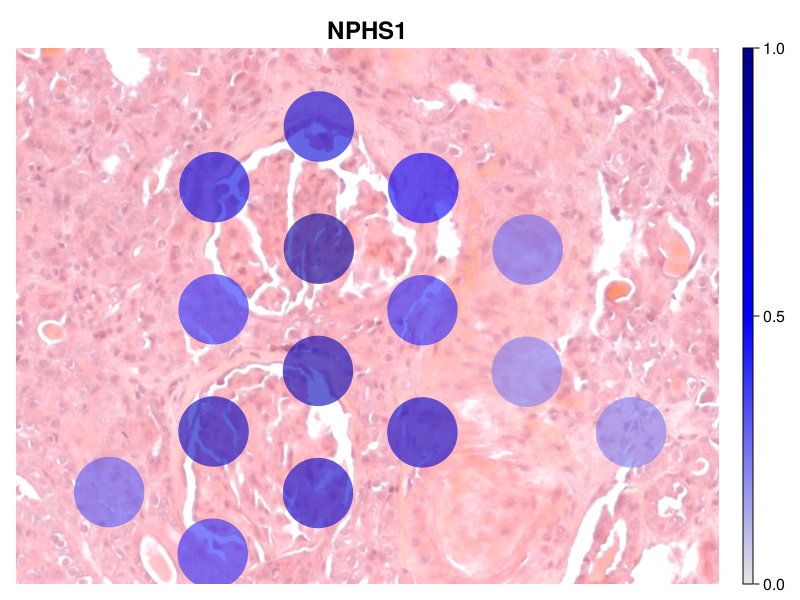

In [10]:
p = cs.sp_feature_plot(dkd1, ["NPHS1"]; 
    marker_size = 100, color_keys=["gray90", "blue" ,"darkblue"], 
    adjust_contrast=1.5, adjust_brightness = 0.1, scale=true, alpha=[0,.6],clip=0.2,
    height=600, width=800,img_res="full",  
    x_lims=(4800, 5600),
    y_lims=(5600, 6200))

save("../../plots/version_1/supp_figures_cs/spFeaturePlot_cs_NPHS1_zoom.png", p);
save("../../plots/version_1/supp_figures_cs/spFeaturePlot_cs_NPHS1_zoom.pdf", p);
save("../../plots/version_1/supp_figures_cs/spFeaturePlot_cs_NPHS1_zoom.svg", p);
p

### Step 4. Generate spatial dim plot for each cluster

#### 4.1. Add meta data

In [11]:
using CSV
using DataFrames

In [12]:
anno_df = CSV.read("../../meta/Morph-based_v2.csv", DataFrame);
dkd1.metaData.cluster = String.(anno_df[!,"Morph-based"]);
dkd1.spmetaData.cluster = String.(anno_df[!,"Morph-based"]);

In [13]:
cell_anno = ["Glomeruli", "PT", "Inj-T", 
    "LH-CD", "Cast-T", "TLS", 
    "I-IFTA",
    "Artery-C", "Artery-K", 
    "Tumor", "Capsule", 
    "Other"]
c_map = ["#FFFF00", "#a7c957", "#6a994e", 
    "#90e0ef", "#0096c7", "#800080", 
    "#A95C68", 
    "#ff5a5f", "#AD002A", 
    "#495057", "#BF8F00", 
    "#ced4da"]
anno_color=Dict{String, Any}(cell_anno .=> c_map);

In [14]:
key_array = collect(keys(anno_color));
alpha = 0.01
color_code = ("#000000",alpha)

for key_to_keep in key_array
    # Create a copy of the initial dictionary
    new_dict = copy(anno_color)

    # Set all keys to 0
    for key in keys(new_dict)
        new_dict[key] = color_code
    end

    # Set the specific key to 1
    new_dict[key_to_keep] = anno_color[key_to_keep]

    p = cs.sp_dim_plot(dkd1, "cluster"; 
    marker_size = 13, canvas_size = (800,750), adjust_contrast=1.5, adjust_brightness = 0.1,
    do_label=false, alpha=1, img_res="high", anno_color=new_dict);
    
    save("../../plots/version_1/supp_figures_cs/spDimPlot_cs_"*key_to_keep*".png", p)
    save("../../plots/version_1/supp_figures_cs/spDimPlot_cs_"*key_to_keep*".pdf", p)
    save("../../plots/version_1/supp_figures_cs/spDimPlot_cs_"*key_to_keep*".svg", p)
    
end

#### Step 4.2. Generate Artery C + K spDimPlot

In [16]:
key_to_keep = ["Artery-C", "Artery-K"]

new_dict = copy(anno_color)

# Set all keys to 0
for key in keys(new_dict)
    new_dict[key] = color_code
end

for key in key_to_keep
    new_dict[key] = anno_color[key]
end

p = cs.sp_dim_plot(dkd1, "cluster"; 
    marker_size = 13, canvas_size = (800,750), adjust_contrast=1.5, adjust_brightness = 0.1,
    do_label=false, alpha=1, img_res="high", anno_color=new_dict);
p

save("../../plots/version_1/supp_figures_cs/spDimPlot_cs_Artery_C_K.png", p);
save("../../plots/version_1/supp_figures_cs/spDimPlot_cs_Artery_C_K.pdf", p);
save("../../plots/version_1/supp_figures_cs/spDimPlot_cs_Artery_C_K.svg", p);

#### Step 4.3. Generate PT + Inj-T + LH-CD + Cast-T  spDimPlot

In [18]:
key_to_keep = ["PT", "Inj-T", "LH-CD", "Cast-T"]

new_dict = copy(anno_color)

# Set all keys to 0
for key in keys(new_dict)
    new_dict[key] = color_code
end

for key in key_to_keep
    new_dict[key] = anno_color[key]
end

p = cs.sp_dim_plot(dkd1, "cluster"; 
    marker_size = 13, canvas_size = (800,750), adjust_contrast=1.5, adjust_brightness = 0.1,
    do_label=false, alpha=1, img_res="high", anno_color=new_dict);
p

save("../../plots/version_1/supp_figures_cs/spDimPlot_cs_PT_Inj_T_LH_CD_Cast_T.png", p);
save("../../plots/version_1/supp_figures_cs/spDimPlot_cs_PT_Inj_T_LH_CD_Cast_T.pdf", p);
save("../../plots/version_1/supp_figures_cs/spDimPlot_cs_PT_Inj_T_LH_CD_Cast_T.svg", p);

In [ ]:
using Pkg
pkgs = Pkg.installed();
pkgs

┌ Warning: Pkg.installed() is deprecated
└ @ Pkg ~/julia-1.9.4/share/julia/stdlib/v1.9/Pkg/src/Pkg.jl:745


Dict{String, VersionNumber} with 6 entries:
  "CSV"        => v"0.10.11"
  "CairoMakie" => v"0.10.12"
  "IJulia"     => v"1.24.2"
  "DataFrames" => v"1.6.1"
  "Leiden"     => v"0.1.0"
  "CellScopes" => v"0.1.0"